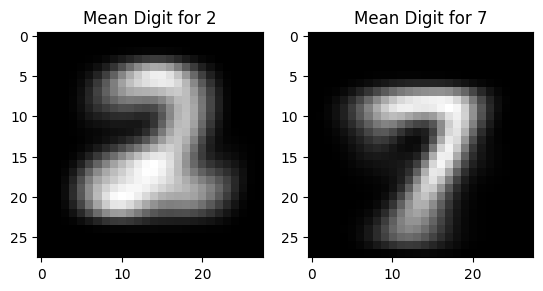

Covariance matrix for 2: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Covariance matrix for 7: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1728.30873103  415.49275646  280.40397492   78.77673441   37.25160715
   11.55124631    5.41617206    3.22471263]
[1728.30873103  415.49275646  280.40397492   78.77673441   37.25160715
   11.55124631    5.41617206    3.22471263]


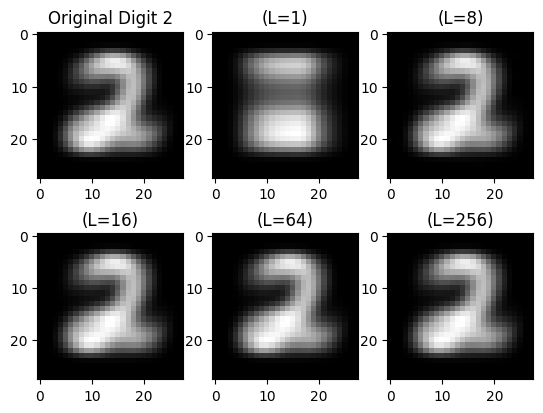

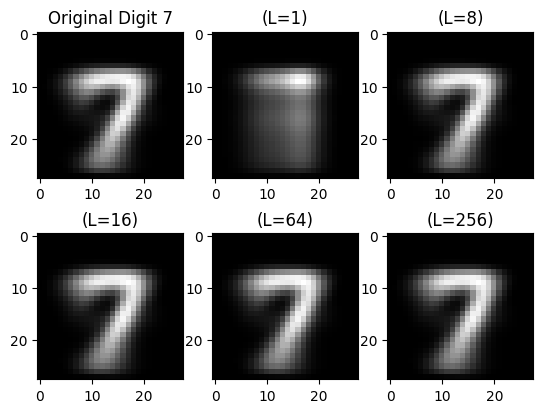

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Filter images and labels for digits 2 and 7
digit_2_indices = np.where((train_labels == 2))[0]
digit_7_indices = np.where((train_labels == 7))[0]
digit_2_test_indices = np.where((test_labels == 2))[0]
digit_7_test_indices = np.where((test_labels == 7))[0]

digit_2_images = np.concatenate([train_images[digit_2_indices]])
digit_7_images = np.concatenate([train_images[digit_7_indices]])

# Calculate mean digit for 2 and 7
mean_digit_2 = np.mean(digit_2_images, axis=0)
mean_digit_7 = np.mean(digit_7_images, axis=0)

# Display mean digits
plt.subplot(1,2,1)
plt.imshow(mean_digit_2, cmap='gray')
plt.title('Mean Digit for 2')
plt.subplot(1,2,2)
plt.imshow(mean_digit_7, cmap='gray')
plt.title('Mean Digit for 7')
plt.show()


# Calculate the covariance matrices
cov_matrix_2 = np.cov(digit_2_images.reshape(-1,28*28), rowvar=False)
cov_matrix_7 = np.cov(digit_7_images.reshape(-1,28*28), rowvar=False)

np.set_printoptions(threshold=1000)

print("Covariance matrix for 2: ")
print(cov_matrix_2)
print("Covariance matrix for 7: ")
print(cov_matrix_7)

# Calculate the SVD of digit 2
u_2, s_2, v_2 = np.linalg.svd(mean_digit_2)
singular_values_2 = s_2[:8]

# Calculate the SVD of digit 7
u_7, s_7, v_7 = np.linalg.svd(mean_digit_7)
singular_values_7 = s_2[:8]

print(singular_values_2)
print(singular_values_7)
# print(u_2[:,:1].shape)
# print(s_2[:1].shape)
# print(v_2[:1,:].shape)

L_values = [1, 8, 16, 64, 256]

# Reconstruct digit 2 using the first L columns of U, S, and V
reconstructed_digit_2 = []

for L in L_values:
    reconstructed_digit = np.dot(u_2[:, :L], np.dot(np.diag(s_2[:L]), v_2[:L, :]))
    reconstructed_digit_2.append(reconstructed_digit)

# Display the original and reconstructed digits
plt.subplot(2, 3, 1)
plt.imshow(mean_digit_2, cmap='gray')
plt.title('Original Digit 2')
plt.subplot(2, 3, 2)
plt.imshow(reconstructed_digit_2[0], cmap='gray')
plt.title(f'(L={1})')
plt.subplot(2, 3, 3)
plt.imshow(reconstructed_digit_2[1], cmap='gray')
plt.title(f'(L={8})')
plt.subplot(2, 3, 4)
plt.imshow(reconstructed_digit_2[2], cmap='gray')
plt.title(f'(L={16})')
plt.subplot(2, 3, 5)
plt.imshow(reconstructed_digit_2[3], cmap='gray')
plt.title(f'(L={64})')
plt.subplot(2, 3, 6)
plt.imshow(reconstructed_digit_2[4], cmap='gray')
plt.title(f'(L={256})')
plt.show()

# Reconstruct digit 7 using the first L columns of U, S, and V
reconstructed_digit_7 = []

for L in L_values:
    reconstructed_digit = np.dot(u_7[:, :L], np.dot(np.diag(s_7[:L]), v_7[:L, :]))
    reconstructed_digit_7.append(reconstructed_digit)

# Display the original and reconstructed digits
plt.subplot(2, 3, 1)
plt.imshow(mean_digit_7, cmap='gray')
plt.title('Original Digit 7')
plt.subplot(2, 3, 2)
plt.imshow(reconstructed_digit_7[0], cmap='gray')
plt.title(f'(L={1})')
plt.subplot(2, 3, 3)
plt.imshow(reconstructed_digit_7[1], cmap='gray')
plt.title(f'(L={8})')
plt.subplot(2, 3, 4)
plt.imshow(reconstructed_digit_7[2], cmap='gray')
plt.title(f'(L={16})')
plt.subplot(2, 3, 5)
plt.imshow(reconstructed_digit_7[3], cmap='gray')
plt.title(f'(L={64})')
plt.subplot(2, 3, 6)
plt.imshow(reconstructed_digit_7[4], cmap='gray')
plt.title(f'(L={256})')
plt.show()


In [ ]:
# Calculate the error of each reconstructed image with the digit 2 images
reconstruction_errors = []

for i,reconstructed in enumerate(reconstructed_digit_2):
    rec_error = np.sum((digit_2_images - reconstructed[None,:,:])**2, axis=(1, 2))
    reconstruction_errors.append(rec_error)

    # Plot the histogram of reconstruction errors
    # each bin represent an error value and in each bin is the number of the images
    # that have a reconstruction error in that range
    plt.subplot(2, 3, i+1)
    plt.hist(reconstruction_errors[i], bins=50, color='blue', alpha=0.7)
    plt.title(f'Digit 2 Error for (L={L_values[i]})')

plt.tight_layout()
plt.show()

# Calculate the error of each reconstructed image with the digit 7 images
reconstruction_errors = []

for i,reconstructed in enumerate(reconstructed_digit_7):
    rec_error = np.sum((digit_7_images - reconstructed[None,:,:])**2, axis=(1, 2))
    reconstruction_errors.append(rec_error)

    # Plot the histogram of reconstruction errors
    # each bin represent an error value and in each bin is the number of the images
    # that have a reconstruction error in that range
    plt.subplot(2, 3, i+1)
    plt.hist(reconstruction_errors[i], bins=50, color='blue', alpha=0.7)
    plt.title(f'Digit 7 Error for (L={L_values[i]})')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the reconstruction errors
reconstruction_errors_2 = []

for i, reconstructed in enumerate(reconstructed_digit_2):
    mse_error = np.sum((mean_digit_2 - reconstructed[None, :, :])**2)  # Calculate mean squared error
    reconstruction_errors_2.append(mse_error)

reconstruction_errors_7 = []

for i, reconstructed in enumerate(reconstructed_digit_7):
    mse_error = np.sum((mean_digit_7- reconstructed[None, :, :])**2)  # Calculate mean squared error
    reconstruction_errors_7.append(mse_error)

# Plot the reconstruction errors in a line plot
plt.plot(L_values, reconstruction_errors_2, marker='o', linestyle='-')
plt.title('Reconstruction 2 Error vs. L')
plt.xlabel('Number of singular values')
plt.ylabel('Mean Squared Error')
plt.show()

# Plot the reconstruction errors in a line plot
plt.plot(L_values, reconstruction_errors_7, marker='o', linestyle='-')
plt.title('Reconstruction 7 Error vs. L')
plt.xlabel('Number of singular values')
plt.ylabel('Mean Squared Error')
plt.show()

# print(reconstruction_errors_2)
# print(reconstruction_errors_7)

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def get_normed_mean_cov(X):
    X_std = StandardScaler().fit_transform(X)
    X_mean = np.mean(X_std, axis=0)
    
    X_cov = np.cov(X_std.T)

    return X_std, X_mean, X_cov

(train_images, train_labels), (test_images,test_labels) = mnist.load_data()
print(train_images.shape)
flattened_images = train_images.reshape((train_images.shape[0], -1))
print(flattened_images.shape)

X_std, X_mean, X_cov = get_normed_mean_cov(flattened_images)
print(X_std.shape)
print(X_mean.shape)
print(X_cov.shape)

(60000, 28, 28)
(60000, 784)
(60000, 784)
(784,)
(784, 784)


In [4]:
# Calculate the standardizes data, the mean and covariance matrix
train_std = StandardScaler().fit_transform(flattened_images)
train_mean = np.mean(flattened_images, axis=0)
train_cov = np.cov(flattened_images.T)

# Calculate the eigenvalues and eigen vectors of covariance matrix
eigenvals, eigenvecs = np.linalg.eig(train_cov)

# Eigenvalues are not necessarily sorted, so we sort them
unsorted_eig = [(np.abs(eigenvals[i]), eigenvecs[:,i]) for i in range(len(eigenvals))]
# Sort tuple by eigenvalues
eigenvalvec = sorted(unsorted_eig, reverse=True, key=lambda x:x[0])

# Create the transformation matrix containing the first 128 eigenvectors
# reshaped into column vectors
matW = np.hstack(pair[1].reshape(784,1) for pair in eigenvalvec[0:128])

rec_train = np.zeros(train_images.shape)

# Reconstruct the train images
for i in range(train_images.shape[0]):
	digit = train_std[i]
	encoded = (matW.T).dot(digit)
	rec_train[i] = (matW.dot(encoded)).reshape(28, 28)


C:\Users\ν\AppData\Local\Temp\ipykernel_4044\1690979972.py:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  matW = np.hstack(pair[1].reshape(784,1) for pair in eigenvalvec[0:128])


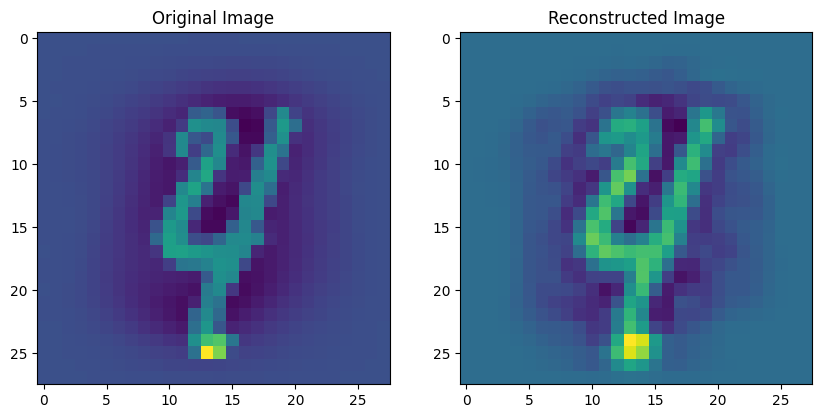

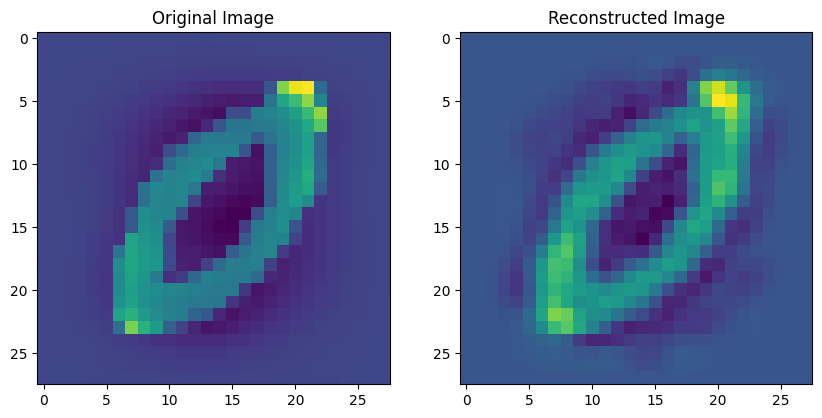

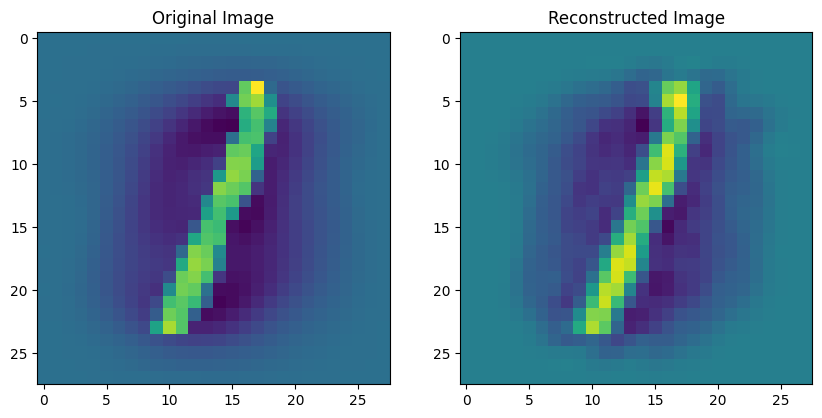

In [5]:
import random as rnd

for i in range(3):
	fig = plt.figure(figsize=(10,6))
	ax1, ax2 = (fig.add_subplot(1,2,j+1) for j in range(2))
	random_digit = rnd.randint(0, train_images.shape[0])
	ax1.imshow(train_std[random_digit].reshape(28, 28))
	ax1.set_title('Original Image')
	ax2.imshow(rec_train[random_digit])
	ax2.set_title('Reconstructed Image')
	plt.show()

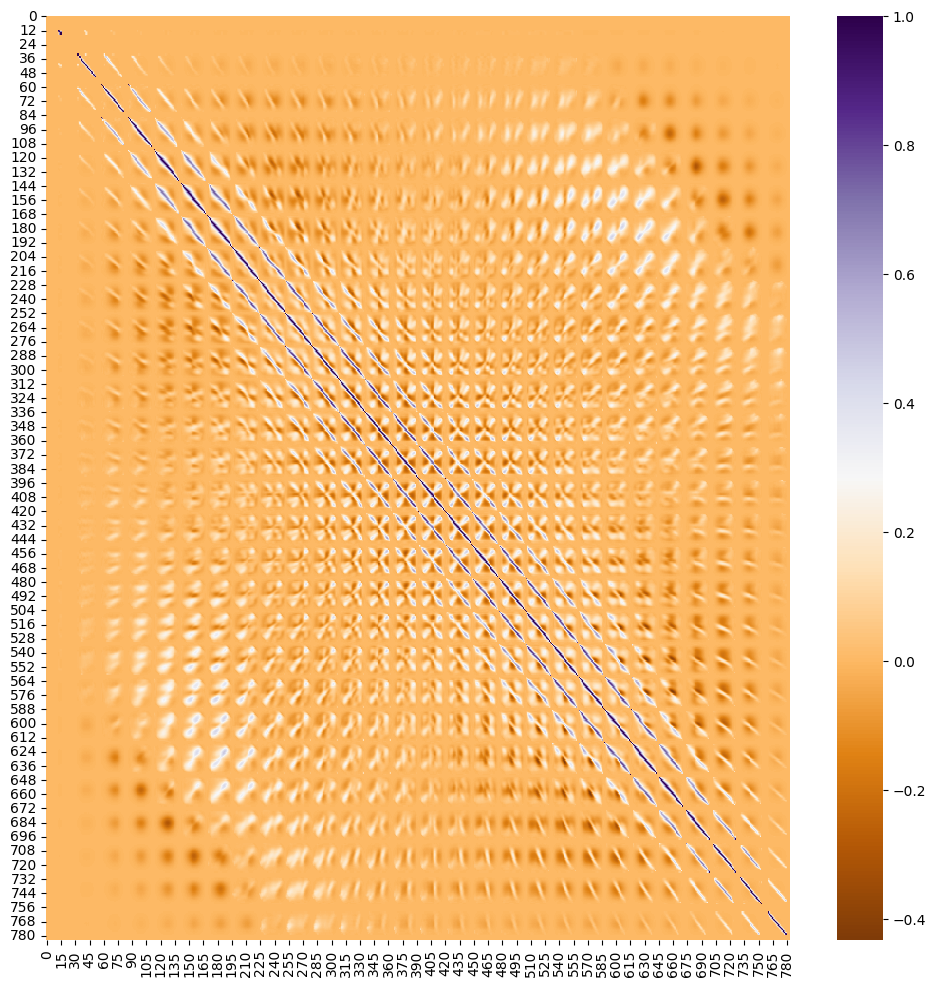

In [15]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(pd.DataFrame(X_cov), annot=False, cmap='PuOr')
plt.show()

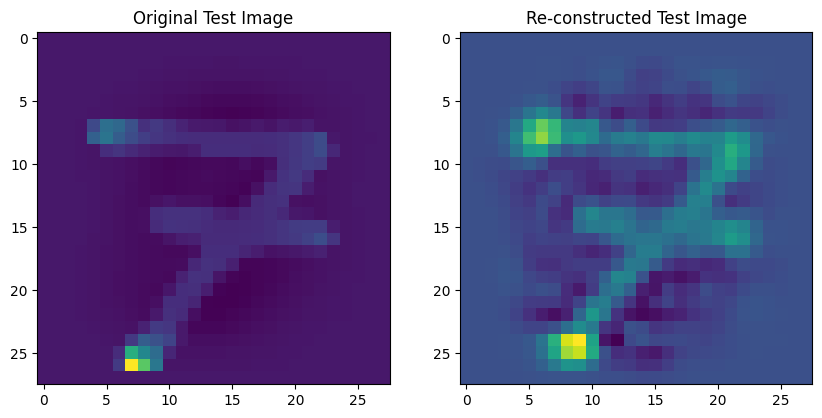

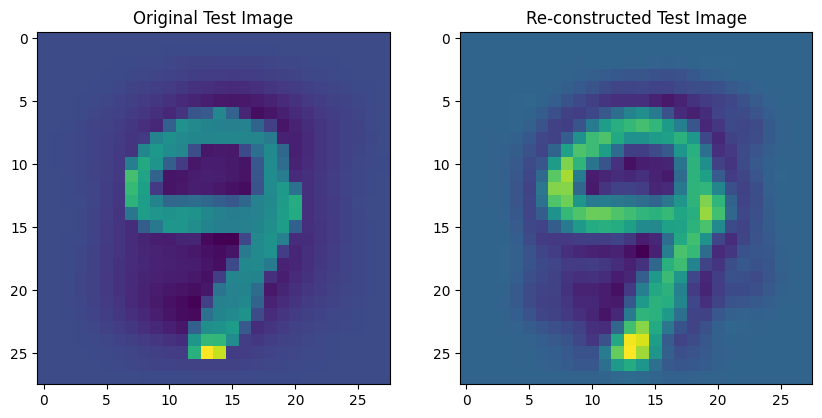

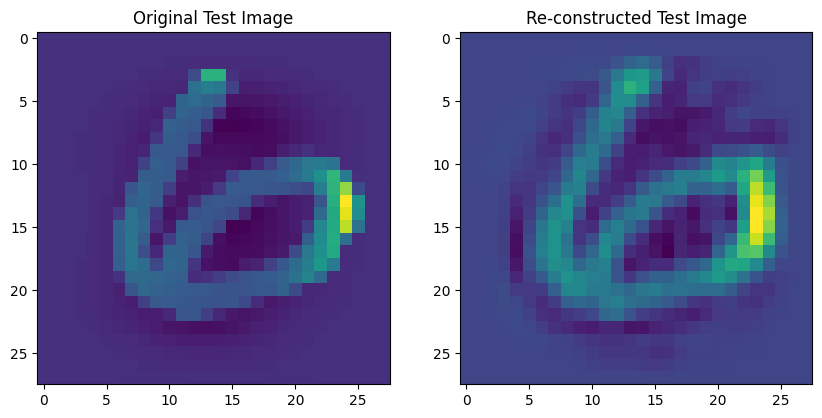

In [20]:
# Flatten the test images
flattened_test = test_images.reshape((test_images.shape[0], -1))

T_std, T_mean, T_cov = get_normed_mean_cov(flattened_test)

for k in range(3):
	# Plot the original and the reconstructed image
    fig = plt.figure(figsize=(10,6))
    ax1, ax2 = (fig.add_subplot(1, 2, 1+i) for i in range(2))
    # Re-construct a random test image
    T_digit = T_std[rnd.randint(0, test_images.shape[0])]
    Z_digit = (matW.T).dot(T_digit)
    That_digit = matW.dot(Z_digit)
    ax1.imshow(T_digit.reshape(28,28))
    ax1.set_title('Original Test Image')
    ax2.imshow(That_digit.reshape(28,28))
    ax2.set_title('Re-constructed Test Image')
    plt.show()

In [21]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

encoding_dim = 128
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu', use_bias=False)(input_img)
# decoded representation of code 
decoded = Dense(784, activation='sigmoid', use_bias=False)(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_entropy')

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
train_mean = np.mean(x_train)
train_std = np.std(x_train)
x_train = (x_train - train_mean)/train_std
test_mean = np.mean(x_test)
test_std = np.std(x_test)
x_test = (x_test - train_mean)/train_std

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=250,
                validation_data=(x_test, x_test))

encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)

plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



(60000, 784)
(10000, 784)
Epoch 1/10


ValueError: in user code:

    File "c:\Users\ν\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\ν\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ν\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\ν\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\ν\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\ν\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "c:\Users\ν\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "c:\Users\ν\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "c:\Users\ν\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2663, in get
        return deserialize(identifier)
    File "c:\Users\ν\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2617, in deserialize
        return deserialize_keras_object(
    File "c:\Users\ν\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\saving\legacy\serialization.py", line 557, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'binary_entropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
